# Homework 5 - Gender Differences in University Enrollment

The objective of this homework is to practice visualizing data. To successfully complete this homework, you may use any resources available to you. 

Get the `universities.csv` data. This is data from the [National Center for Education Statistics](https://nces.ed.gov/ipeds/datacenter/DataFiles.aspx). Develop **three** plots:
1. A boxplot of the average number of total enrollment for the states in the U.S. West
    * The States in the U.S. West are
        * Alaska
        * Arizona
        * California
        * Colorado
        * Hawaii
        * Idaho
        * Montana
        * Nevada
        * New Mexico
        * Oregon
        * Utah
        * Washington
        * Wyoming (see prepared list `uswest`)
    * Order the plot based on the number of institutions in the state
2. A boxplot of the average number of enrollment per gender category (hue) and state in the U.S. West
    * Please notice that enrollment numbers for men and women are in two separate columns.
    * Hue requires one column, which means you have to 'melt' the dataset ([Link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)).
    * The results should be a dataframe with two rows (one for men, one for women) for each university
3. A ordered barplot of the ratio of admissions for men and women for universities in the Bay Area
    * We assume that the Bay Area is characterized with zip codes that start with `950` and `94`
    * Focus on institutions with more than 1,000 enrollments.
    * Develop the ratio of admissions for women and for men. Standardize this ratio on the mean. 
4. Interpret you plots in terms of gender differences. 

Hints:
* Make sure your plots are nicely formatted (including axes label).
* Explain what you are doing.
* Use references.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [339]:
import warnings
warnings.filterwarnings('ignore')

In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
import seaborn as sns

In [12]:
c = students = pd.read_csv('https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
universities.csv')

In [13]:
uswest = ['AK','AZ','CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

### 1) A boxplot of the average number of total enrollment for the states in the U.S. West<br><br>
**'west' is a series with just the 'uswest' states from above. First, groupby states and find the enrollment mean for those states. Then, create a new column to count number of institutions in that state. Finally, sort data by the count.**

In [487]:
west = students[students['STABBR'].isin(uswest)].groupby(['STABBR','UNITID'])['ENRLT'].mean()

In [488]:
dfwest = pd.DataFrame(west)

In [489]:
dfwest.reset_index(inplace=True)


In [490]:
dfwest.columns

Index(['STABBR', 'UNITID', 'ENRLT'], dtype='object')

In [482]:
dfwest['count'] = dfwest.groupby('STABBR')['STABBR'].transform(pd.Series.value_counts)

In [483]:
dfwest1 = dfwest.sort_values(by='count', ascending=False)

[Text(0,0.5,'Enrollment'), Text(0.5,0,'States')]

Text(0.5,1,'Avg Total Enrollments in Western States')

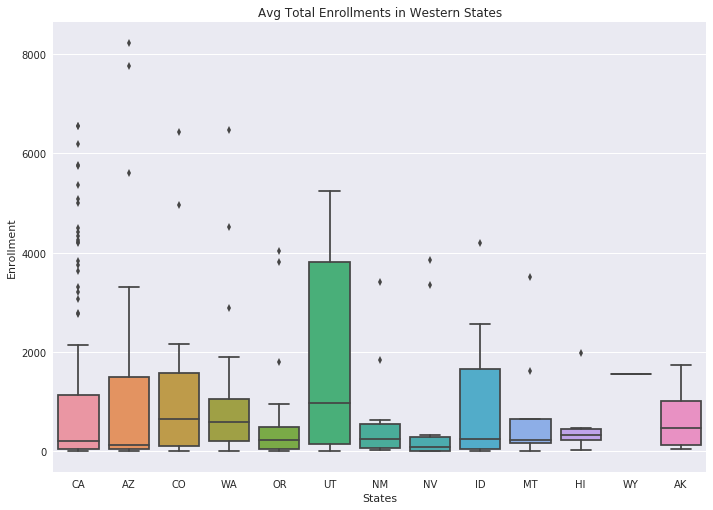

In [484]:
st = sns.boxplot( x='STABBR',y= 'ENRLT', data=dfwest1)
st.set(xlabel='States', ylabel='Enrollment')
st.set_title('Avg Total Enrollments in Western States')
plt.figure(figsize=(60,20))

**This plot is generated with all NaN values in place, which could distort the data quiet alot when mean is calculated. See below for plot with all NaN values removed**

In [493]:
# This is data with NaN values dropped
dfwestN = dfwest[np.isfinite(dfwest['ENRLT'])]

In [494]:
dfwestN['count'] = dfwestN.groupby('STABBR')['STABBR'].transform(pd.Series.value_counts)

In [497]:
dfwestN1 = dfwestN.sort_values(by='count', ascending=False)

[Text(0,0.5,'Enrollment'), Text(0.5,0,'States')]

Text(0.5,1,'Avg Total Enrollments in Western States')

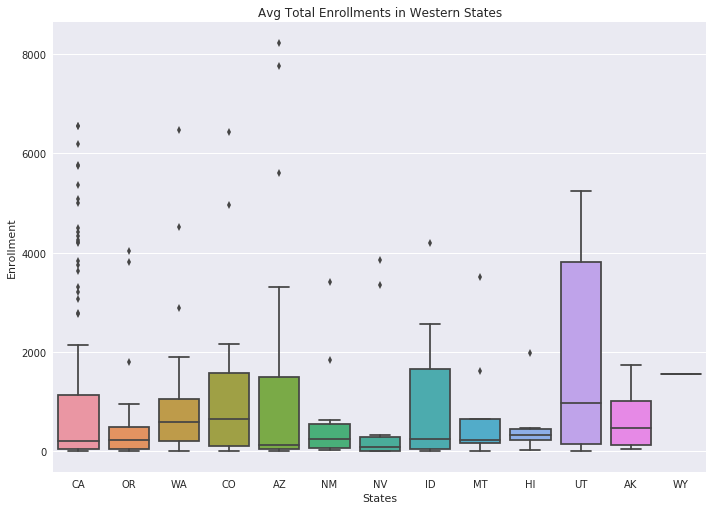

In [498]:
st = sns.boxplot( x='STABBR',y= 'ENRLT', data=dfwestN1)
st.set(xlabel='States', ylabel='Enrollment')
st.set_title('Avg Total Enrollments in Western States')
plt.figure(figsize=(60,20))

**There is a significant numbers of outliers for states with alot of universities(most significantly California), which is not suprising, as the enrollment rates for schools will vary due to capacity. This could also explain the various medians for each school; larger schools gets more enrollments which offsets the smaller institutions with very few enrollments**<br><br>

**It needs to be noted that alot of schools did not have enrollment data available, thus States such as Utah or Arizona changed rank after NaN values were droped. Enrollment numbers might also have something to do with area size of the State (more open space = bigger schools).**

### 2) A boxplot of the average number of enrollment per gender category (hue) and state in the U.S. West<br><br>
**To plot the enrollment numbers for different genders, we melt the data to create new columns (or to pivot) for the genders and enrollments for the gender.**

In [451]:
melted = pd.melt(west3, id_vars=['INSTNM','STABBR'], var_name='GENDER',value_name='GENDER_ENRLMT')

In [452]:
# Find mean of enrollment according to gender
genMean = melted.groupby(['STABBR','GENDER','INSTNM'])['GENDER_ENRLMT'].mean()

In [460]:
# Turn series into dataframe in order to plot
dfgen = pd.DataFrame(genMean)

In [463]:
# Rename columns
dfgen.reset_index(inplace=True)
dfgen.columns = ['State','Gender','Institution','Gender Enrollment']

[Text(0,0.5,'Enrollment'), Text(0.5,0,'States')]

Text(0.5,1,'Avg Enrollments per Gender in Western States')

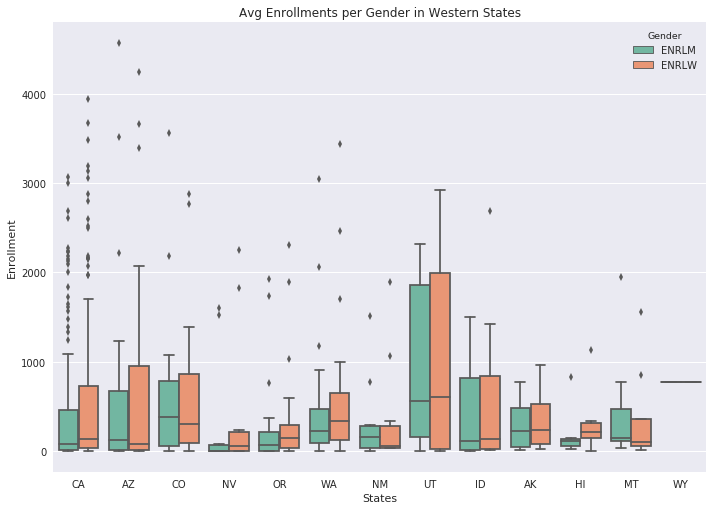

In [470]:
genderplot = sns.boxplot(x="State", y="Gender Enrollment", hue="Gender",
                 data=dfgen, palette="Set2")
genderplot.set(xlabel='States', ylabel='Enrollment')
genderplot.set_title('Avg Enrollments per Gender in Western States')



**Just looking at the trend in enrollment based on gender, we can see that overall, gender is quiet balanced, in exception to states such as Hawaii, Nevada, or Oregan. It is suprising to see more women are enrolled in Universities as opposed to older generations of Americans. The largest gender disparities could be seen in states such as California and Hawaii, but this could also be due to data distortion; there are alot of universities in California whereas there is very few in Hawaii.**

### 3) A ordered barplot of the ratio of admissions for men and women for universities in the Bay Area<BR>
We assume that the Bay Area is characterized with zip codes that start with 950 and 94<br>
Focus on institutions with more than 1,000 enrollments.<br>
Develop the ratio of admissions for women and for men. Standardize this ratio on the mean.<br><br>

**First, we find the admissions ratio of women and men for each school and fill these into two new columns. Then, we find the overall mean of admission ratio for both genders in all schools of the bay area. Finally, we normalize the mean admission ratio for both genders and for each school by dividing the origial ratio by the computed overall mean admission ratio; these will be put into two new columns. In total, we should have 4 new columns, two for original admission ratio of both genders and two for normalized admission ratio.**

In [348]:
# filter to get data for Bay Area
bay = students[(students['ZIP'].str.startswith('950'))|(students['ZIP'].str.startswith('94'))& (students['ENRLT']>1000)]

In [357]:
# Find admission ratio
bay['Total Admission'] = bay['ADMSSNW']+bay['ADMSSNM']
bay['Female Admission Ratio'] = bay['ADMSSNW']/bay['Total Admission']
bay['Male Admission Ratio'] = bay['ADMSSNM']/bay['Total Admission']

**The resulting dataframe contains some schools with NaN values for enrollment ; we will filter those out as well.**

In [358]:
bay1 = bay[np.isfinite(bay['ENRLT'])]

In [361]:
# find overall mean of each gender for all schools in the Bay Area
f_ratiomean = bay1['Female Admission Ratio'].mean()
m_ratiomean = bay1['Male Admission Ratio'].mean()

In [382]:
# Normalize gender ratios based on mean
bay1['Female Ratio'] = bay1['Female Admission Ratio']/f_ratiomean
bay1['Male Ratio'] = bay1['Male Admission Ratio']/m_ratiomean
bay2 = bay1[['INSTNM','Female Ratio','Male Ratio']]

In [466]:
# Melt the data & sort
meltedgen = pd.melt(bay2, id_vars=['INSTNM'], var_name='Gender',value_name='Ratio')
meltedSort = meltedgen.sort_values(by=['Gender','Ratio'],ascending=False)

In [467]:
# Reset index to solidify changes
meltedSort.reset_index(inplace=True)

[Text(0,0.5,'Admission Ratio'), Text(0.5,0,'School Name')]

Text(0.5,1,'Admission Ratio for Schools in the Bay Area')

[Text(0,0,'Stanford University'),
 Text(0,0,'University of California-Berkeley'),
 Text(0,0,'University of California-Santa Cruz'),
 Text(0,0,'Santa Clara University'),
 Text(0,0,'San Francisco State University'),
 Text(0,0,'California State University-East Bay'),
 Text(0,0,'Sonoma State University'),
 Text(0,0,'University of San Francisco')]

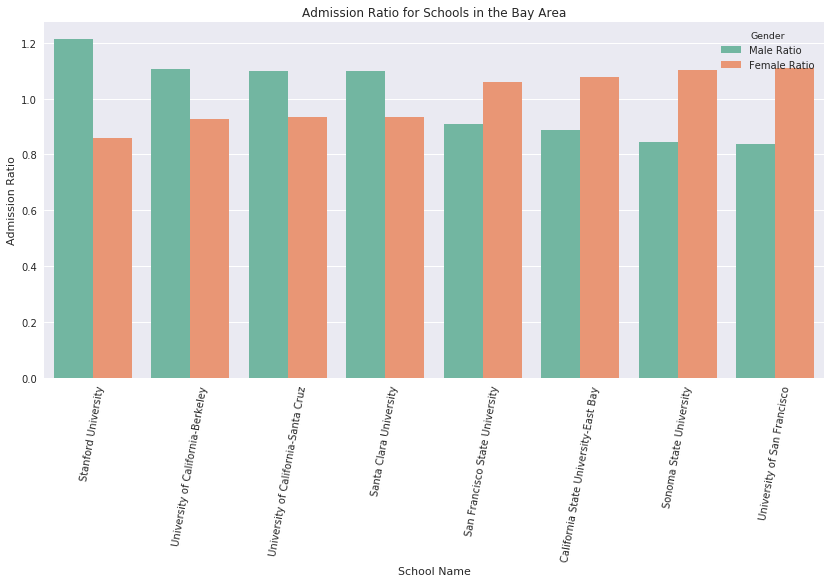

In [468]:

genratio = sns.barplot(x="INSTNM", y="Ratio", hue="Gender",
                 data= meltedSort, palette="Set2")
genratio.set(xlabel='School Name', ylabel='Admission Ratio')
genratio.set_title('Admission Ratio for Schools in the Bay Area')

labels = meltedSort.INSTNM.values[:]
genratio.set_xticklabels(labels, rotation=80)

plt.tight_layout()
plt.figure(figsize=(60,20))


**Ratios above 1.0 means that the admission rate is above average and vice versa. The gender disparity is the greatest in Schools such as Stanford and Berkeley; Santa Clara fits somewhere in the middle, with admission rate close to 1.0 for both genders. It would be interesting to do an additional study to examine the correlation between the types of programs offered by these schools; typically liberal arts type of programs might have more women than men, and the opposite is true for more technical programs. At a glance, this could explain the gender disparity between the schools on both ends of the plot.**

### Sources:<br>
https://stackoverflow.com/questions/30787391/sorting-entire-csv-by-frequency-of-occurence-in-one-column -sort by count<br>
https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame - reindex after sorting<br>
https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot -label axis in seaboard<br>
https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot -set title for chart in seaborn<br>
https://stackoverflow.com/questions/45201514/edit-seaborn-legend -modify legend (didn’t use, for future ref)<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.startswith.html - string filter<br>
https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan -filter nan<br>
https://stackoverflow.com/questions/23160730/plotting-formatting-seaborn-chart-from-pandas-dataframe - rotate axis<br>